# Programming for Data Analysis: Investigation of numpy.random package

Author: Julian Dunne g00267940@gmit.ie

1 - create jupyter notebook explaining the use of the numpy.random package

2 - explain the use of the "Simple random data" and "Permutations" functions

3 - explain the use of at least 5 "Distributions" functions

4 - explain the use of seeds in generating pseudorandom numbers

5 - READ.ME file which only needs to include an explanation of what is contained in the repository and how to run the Jupyter Notebook

***

## 1) The purpose of numpy.random
Numpy is a python package used for scientific and numerical computing. Numpy stores data in multidimensional arrays and is similiar to Python 'Lists' however it is more efficient at storing and accessing this data https://www.educba.com/introduction-to-numpy/?source=leftnav.

Numpy can access this information faster due to the data within these multidimensional arrays being fixed types i.e. float, integer or string. Numpy arrays does not contain different datatypes as can be used in Python 'Lists' which means Numpy does not check for datatypes when analysing data. This reduces the time required by Numpy to retrieve and analyse  data which is beneficial when analysing large amounts of data 
https://www.youtube.com/watch?v=GB9ByFAIAH4&t=1751s.


<img src="numpy_array.png" width="500" height="500">
<br>

<!--image from https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png -->

### Pseudo-random data:
The Numpy library has the ability to simulate random arrays of data, shuffle this data and to draw samples from this data based on specified distributions, all of which will be looked at further as part of this assignment. 

When introducing the Numpy random module it is interesting to note that the data generated using this method is not actually random. Computers work on programs which are a definitive set of instructions so an algorithm within the program must generate the random number as well. If there is a program to generate a random number it can be predicted. Meaning it is not a truly random number. Random numbers generated this way are called pseudo random
https://www.w3schools.com/python/numpy_random.asp.


### Permuted Congruential Generator (PCG-64)
Numpy produces pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions
http://www.numpy.org.cn/en/reference/routines/random.html#quick-start. 

BitGenerators do not directly provide random numbers and only contain methods used for seeding, getting or setting the state, jumping or advancing the state, and for accessing low-level wrappers for consumption by code that can efficiently access the functions provided 
https://numpy.org/devdocs/reference/random/bit_generators/index.html.
     
The Generator provides access to a wide range of distributions. The Generator relies on an the BitGenerator to manage state and generate the random bits, which are then transformed into random values from specific distributions. This structure allows alternative bit generators to be used with little code duplication. The default BitGenerator used by Generator is PCG64 
https://numpy.org/devdocs/reference/random/generator.html.

PCG-64 is a 128-bit implementation of O’Neill’s permutation congruential generator. PCG-64 has a period of 2^{128} and supports advancing an arbitrary number of steps as well as 2^{127} streams https://numpy.org/devdocs/reference/random/bit_generators/pcg64.html. 
The Permuted Congruential Generator uses a linear congruential generator as the state-transition function. Linear congruential generators are known to be statistically weak, but PCG's state transition function only does half the work. PCG uses a technique called permutation functions on tuples to produce output that is much more random than the random number generators internal state. PCG's output functions are what gives it its excellent statistical performance and makes it hard predict from its output 
https://www.pcg-random.org/.

The numpy.random package serves many purposes, some of which will be looked at in greater detail in the following sections.
Some applications where random module is used include: 

1) Generate pseudo-random data which can be used to test machine learning models

2) Create different types of data using a range of distributions as part of statistical analysis on a data group

***

## 2) Simple Random Data and Permutations Functions

Numpy has a number of functions for generating libraries of pseudo random data. Using built-in methods which will be discussed in the section below it can randomly create and configure this pseudo random data. These are numpy's Simple Random Data methods:

In [1]:
#Import the numpy libraries to be used throughout this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### i) random.default_rng().integers()
The random integers method replaces randomstate.randint method used in previous versions on numpy. Returns an array of random integers that are from the “discrete uniform” distribution for a specified dtype
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers.

In [2]:
# Generate a random array of 0 and 1 integers
rng_integers = np.random.default_rng().integers(2, size=(16))
rng_integers

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

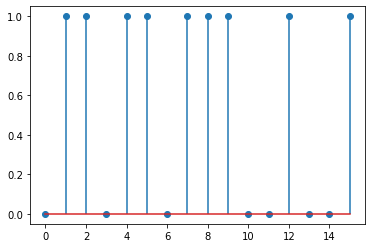

In [3]:
#Generate a signal using binary numbers using rng_integers generated above
plt.stem(rng_integers, use_line_collection=True);

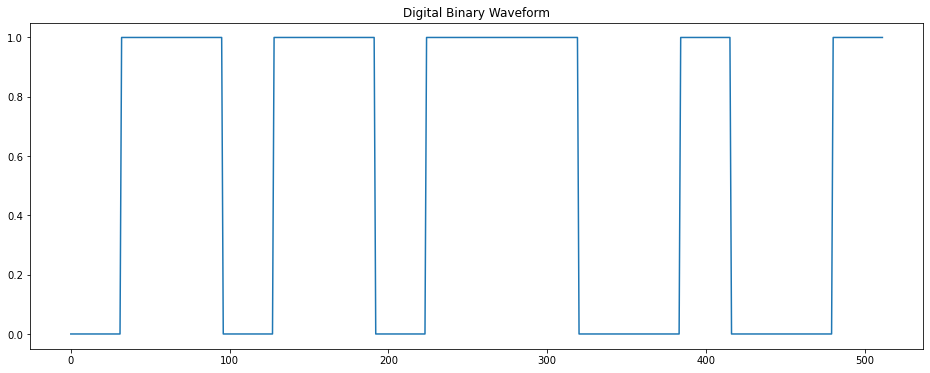

In [4]:
#Plot a digital binary signal (code found using https://www.youtube.com/watch?v=XCDvWF8XSC4)

#samples to represent a symbol
sym_len = 32
#number of symbols (1's or 0's as above)
no_sym = 16

#create entire length of 0's for the signal
sig = np.zeros(sym_len * no_sym)

#where values are 1 this needs to be shown in sig
id_n = np.where(rng_integers == 1)
for i in id_n[0]:
    temp = int(i*sym_len)
    sig[temp:temp+sym_len] = 1

    
plt.figure(figsize=(16, 6))
plt.plot(sig)
plt.title('Digital Binary Waveform');

### ii) random.default_rng().random()
The random random method replaces randomstate.random_sample method used in previous versions on numpy. Returns an array of random floats from the “continuous uniform” distribution over the stated interval
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

Random.random() can be used to create as many floating-point numbers in as many dimensions as is required. All values will be in the range 0.0 - 1.0 (low, high). Note that 1.0 is exclusive meaning all values are below 1.0.

In [5]:
#Generate pseudo-random float
rng_float = np.random.default_rng().random()
rng_float

0.49127740716244606

In [6]:
#Generate pseudo-random multi-dimensional array of floats
rng_multidim_array = np.random.default_rng().random((5,2))
rng_multidim_array

array([[0.15894928, 0.51201278],
       [0.37527049, 0.1684617 ],
       [0.62545112, 0.21536983],
       [0.33810316, 0.10114593],
       [0.27542582, 0.81124929]])

### iii) random.default_rng().choice()
Generates a random sample from a given 1-D array which can be of a single data type such as either: integer, float or string https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice.

There are several applications for the random choice method:
* Generate a random uniform sample with(out) replacement
* Generate a random non-uniform sample using probability with(out) replacement
* The above can be applied to an arbitrary array-like instead of just integers e.g. dtype=string

In [7]:
# Generate a random uniform sample without replacement
rng_choice_1 = np.random.default_rng().choice(10, 6, replace=False)
rng_choice_1

array([4, 1, 5, 8, 9, 6], dtype=int64)

In [8]:
# Generate a random non-uniform sample using probability 'p' with replacement
rng_choice_2 = np.random.default_rng().choice(5, 10, p=[0.2, 0, 0, 0.8, 0])
rng_choice_2

array([3, 3, 3, 3, 3, 0, 3, 3, 3, 3], dtype=int64)

### Human versus computer random choice guessing game

In this game a letter is chosen by the computer from a list and stored in the variable the_winning_letter.
You will will play against the computer to see who picks the correct letter first.
If you guess wrong and the computer guesses wrong then you will win by default!

<img src="lets_play.jpg" width="500" height="500">
<br>

<!--image from https://www.shutterstock.com/image-vector/lets-play-on-colorful-banner-1808027134 -->

Using random choice method the computer picks the winning letter from the list and stores it in a variable.

In [ ]:
#Import the numpy libraries to be used throughout this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
list_of_letters = ['a', 'b', 'c',]
the_winning_letter= np.random.default_rng().choice(list_of_letters)

First guess is for you.

Note: Your guess will then removed from the list so it is not chosen again.

In [ ]:
human_guess = ''
list_of_letters.remove(human_guess)

In [ ]:
if human_guess != the_winning_letter:
    print("Unlucky, not this time.")
else:
    print("That was quick")

Program checks to see if you have guessed correctly. If you guess correctly first time then the cell below will restart and clear the kernel output as there is no reason to continue. If your guess is incorrect then skip the cell below and continue the game https://stackoverflow.com/questions/37472274/jupyter-disable-restart-kernel-warning/47055462#47055462.

In [ ]:
#Only run this code block if you incorectly guessed the letter!!
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")


The next guess is for the computer. Again the letter guessed is removed from the list.

In [ ]:
comp_guess = np.random.default_rng().choice(list_of_letters)
list_of_letters.remove(comp_guess)

Program checks to see if the computer has guessed correctly.

In [ ]:
if comp_guess == the_winning_letter:
    print("Computer wins!")
else:
    print("You have beaten the computer by default as this is the last letter left: ", list_of_letters)


<img src="game_over.jpg" width="500" height="500">
<br>

<!--image from https://www.shutterstock.com/image-vector/decorative-game-over-text-fashion-poster-1307904490 -->

### iv) np.random.default_rng().bytes()

Returns string of length(length) based on specified number of random bytes(len) https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes.

In [9]:
u=np.random.bytes(2)
u

b' Z'

In [10]:
#The type returned is shown as bytes
s = u
type(s)

bytes

### Permutation
Randomly permutes a sequence or to return a permuted range. Permute method allows user to pseudo-randomly change to element order in an array or to change the row order without changeing the element order for instances where an array contains more than one row https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation.  

In [11]:
#change the order of the array - instead on return ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
rng_permute1 = np.random.default_rng().permutation(10)
rng_permute1

array([0, 4, 2, 5, 1, 3, 9, 6, 7, 8])

In [12]:
#change the order of array without changing the order of the elements in each row
arr_permute = np.arange(12).reshape((2, 2, 3))
rng_permute2 = np.random.default_rng().permutation(arr_permute)
rng_permute2

array([[[ 6,  7,  8],
        [ 9, 10, 11]],

       [[ 0,  1,  2],
        [ 3,  4,  5]]])

### Shuffle
Returns a modified sequence by shuffling its contents pseudo-randomly. Method only shuffles the array along the first axis of a multi-dimensional array. The orders of sub arrays is changed but elements within each remain the same.

In [13]:
#Elements in each row are the same but are returned in a modified sequence
arr_sh1 = np.arange(9).reshape((3, 3))
rng_shuffle1 = np.random.default_rng().shuffle(arr_sh1, axis=1)
arr_sh1

array([[2, 0, 1],
       [5, 3, 4],
       [8, 6, 7]])

In [14]:
#Method on shuffles the first axis of a multidimensional array. Elements in each row stay in the same sequence
arr_sh2 = np.arange(16).reshape((2, 2, 4))
rng_shuffle2 = np.random.default_rng().shuffle(arr_sh2, axis=1)
arr_sh2

array([[[ 4,  5,  6,  7],
        [ 0,  1,  2,  3]],

       [[12, 13, 14, 15],
        [ 8,  9, 10, 11]]])

### Apply the permutation method to a pandas dataframe

In [15]:
#Create a pandas dataframe from the random_permutations.txt file (created by author just for example)
data = pd.read_csv('random_permutations.txt', delimiter=r",")
data.set_index(['Identifier', 'country', 'city', 'language'])
data

,Identifier,country,city,language
0,Ire,Ireland,Dublin,english
1,Hun,Hungary,Budapest,hungarian
2,Ger,Germany,Berlin,german
3,Swe,Sweden,Stockholm,english
4,Fra,France,Paris,french


In [16]:
#pseudo-randomly change order of nrows using permute method
#generate a new row order called permuted_row
nrows = data.shape[0]
permuted_row = np.random.default_rng().permutation(nrows)

In [17]:
#New order of rows to be displayed in dataframe
permuted_row

array([3, 2, 0, 4, 1])

In [18]:
#Apply new order using the take function
data.take(permuted_row)

,Identifier,country,city,language
3,Swe,Sweden,Stockholm,english
2,Ger,Germany,Berlin,german
0,Ire,Ireland,Dublin,english
4,Fra,France,Paris,french
1,Hun,Hungary,Budapest,hungarian


The code for the above dataframe permutation was written by the author with assistance from online searches including a video on Pandas DataFrames: Permutation https://www.youtube.com/watch?v=zr7O2egWKQc.

***

## 3) Distribution Functions

In [19]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### i) np.random.uniform()

Uniform distribution is a type of probability distribution in which all outcomes are equally likely. There are two types of uniform distributions: discrete and continuous. The roll of a die generates a discrete distribution with p = 1/6 for each outcome. With a continuous distribution, every point in the continuous range between 0.0 and 1.0 has an equal opportunity of appearing, yet there are an infinite number of points between 0.0 and 1.0 https://www.investopedia.com/terms/u/uniform-distribution.asp.

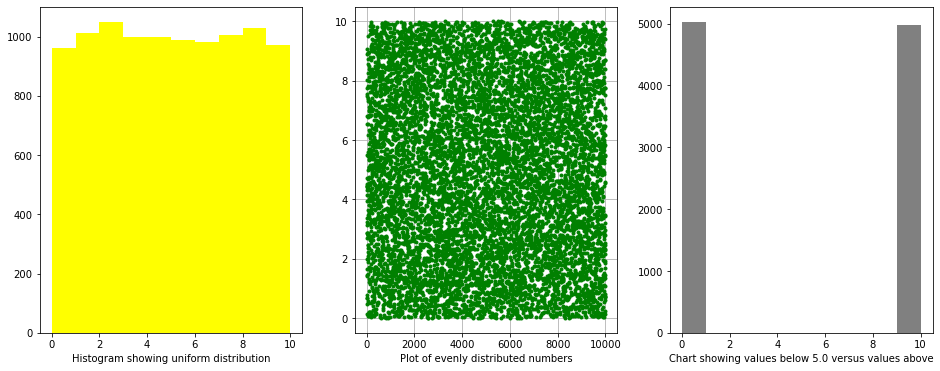

In [20]:
#Set a figure size for plots and generate array for continuous uniform distribution
plt.figure(figsize=(16, 6))
rng_uniform = np.random.default_rng().uniform(0, 10, 10000)

#Using subplot to display various plots side be side
plt.subplot(1, 3, 1)
plt.hist(rng_uniform, color='yellow')
plt.xlabel("Histogram showing uniform distribution")

plt.subplot(1, 3, 2)
plt.plot(rng_uniform, 'g.')
plt.xlabel("Plot of evenly distributed numbers")
plt.grid()

#Set values in array to either 0 (less than 5.0) or 10 (equal or greater than 5.0)
zero_or_ten = rng_uniform
zero_or_ten[np.where(zero_or_ten < 5.0)] = 0
zero_or_ten[np.where(zero_or_ten >= 5.0)] = 10
plt.subplot(1, 3, 3)
plt.hist(zero_or_ten, color='grey')
plt.xlabel("Chart showing values below 5.0 versus values above")
plt.show()

#Information for applying subplots @ https://www.tutorialexample.com/understand-matplotlib-plt-subplot-a-beginner-introduction-matplotlib-tutorial/

In [21]:
#Count number of values below 5.0 and number of values greater than or equal to 5.0

print("The number of values below 5.0 =", np.count_nonzero(rng_uniform < 5.0))
print("The number of values equal or greater to 5.0 =", np.count_nonzero(rng_uniform >= 5.0))

#Found idea for count_nonzero method @ https://numpy.org/devdocs/reference/generated/numpy.count_nonzero.html

The number of values below 5.0 = 5022
The number of values equal or greater to 5.0 = 4978


### ii) np.random.normal()
Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve 
https://www.investopedia.com/terms/n/normaldistribution.asp. 

Normal distribution often occurs in nature. The height is of a population example follows a normal distribution pattern. Most people are of average height with the number of people that are taller and shorter than average fairly equal. Only a small number of people are either extremely tall or extremely short. In a normal distribution the mean mode and median are all the same 
https://www.tutorialspoint.com/statistics/normal_distribution.htm.

Data set downloaded at https://www.kaggle.com/mustafaali96/weight-height. Units were not included so values are to be treated as dimensionless.

In [22]:
#Read in the entire csv file
df = pd.read_csv('population_bio.csv')

#Remove 'Weight' column as it is not required for this study
df_height = df[['Gender', 'Height']]

#Remove 'Female' rows as this study is only looking at the 'Male' heights
df_height_male = df_height[df_height.loc[:, 'Gender'] == 'Male']
#first 5 rows
df_height_male.head()


,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


### Plot actual heights versus pseudo random generated values

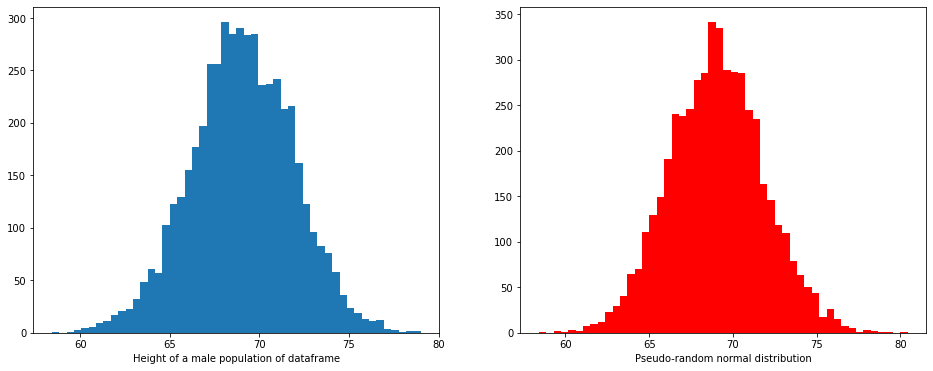

In [23]:
#Set figsize
plt.figure(figsize=(16, 6))

#Subplot histogram of the height of the actual data
plt.subplot(1, 2, 1)
plt.hist(df_height_male['Height'], bins=50)
plt.xlabel("Height of a male population of dataframe")

#Subplot histogram of pseudo-randomly generated data
plt.subplot(1, 2, 2)
rng_normal = np.random.normal(loc=69.026346, scale=2.863362, size=5000)
plt.hist(rng_normal, bins=50, color='red')
plt.xlabel("Pseudo-random normal distribution")
plt.show()


Both histograms above are clearly very similiarly distributed with similiar mean for both(units were not provided with dataset when downloaded).

In [24]:
df_height_male['Height'].describe()

count    5000.000000
mean       69.026346
std         2.863362
min        58.406905
25%        67.174679
50%        69.027709
75%        70.988744
max        78.998742
Name: Height, dtype: float64

The describe function returns statistical details for the actual height of the male population for the dataframe. It shows that the mean and the 50th percentile are very similiar which is to be expected when data is normally distributed.

### iii) np.random.binomial()
A Binomial distribution is used to demonstrate the probable outcome of a test that is repeated multiple times. Binomial refers to there being only two possible outcomes e.g. True or False https://www.youtube.com/watch?v=5QraKdZ_hUo.

Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial.

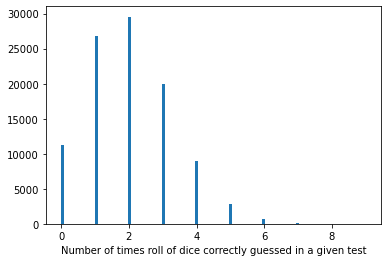

In [25]:
#Determine the probability that a value between 1-6 is correctly guessed 
#and the number of times it is guessed in each test when each test is 12 attempts
#the test is run 100000 times  
rng_binomial = np.random.default_rng().binomial(12, 0.167, 100000)
plt.hist(rng_binomial, bins=100)
plt.xlabel("Number of times roll of dice correctly guessed in a given test")
plt.show()

In [26]:
#Calculate the probability that 2 guesses will be correct in a given test (https://www.youtube.com/watch?v=h8T2dwZJMUw)
rng_binomial_estimate = (sum(rng_binomial == 2)/100000)*100

#Result shows % probability that 2 rolls of the dice will be correctly guessed in a given test.
rng_binomial_estimate

29.558

In [27]:
#Import the collections library and using the Counter function
#Record the number of occurences of each element in the array
import collections

rng_binomial_count = np.array(rng_binomial)
collections.Counter(rng_binomial_count)

#See link https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray

Counter({1: 26779,
         3: 19905,
         2: 29558,
         0: 11224,
         5: 2838,
         4: 8895,
         6: 664,
         7: 120,
         8: 15,
         9: 2})

### iv) np.random.pareto()
The Lomax or Pareto II distribution is a shifted Pareto distribution. The classical Pareto distribution can be obtained from the Lomax distribution by adding 1 and multiplying by the scale parameter https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.pareto.html#numpy.random.Generator.pareto.

The Pareto distribution is also known as the “80-20 rule”. In this distribution, 80 percent of the weights are in the lowest 20 percent of the range, while the other 20 percent fill the remaining 80 percent of the range. It was initially used to describe the distribution of wealth in an economy and has since been found to be useful when applied to many other social, scientific, geophysical, actuarial and various other types of observable phenomenon https://towardsdatascience.com/generating-pareto-distribution-in-python-2c2f77f70dbf.

<b>The probability density for the Pareto distribution where a is the shape and m the scale:<b>

$$ pareto(x) = \frac{am^a}{x^{a+1}} $$


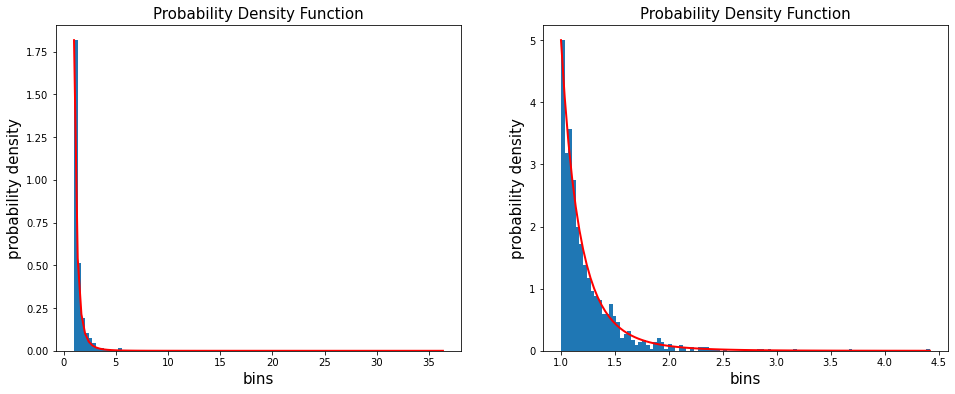

In [28]:
#Set a figure size for plots and generate array for continuous uniform distribution
plt.figure(figsize=(16, 6))

#x_m is scale and alpha is shape parameter
x_m, alpha = 1, 3
sample_a = (np.random.default_rng().pareto(alpha, 1000) + 1) * x_m

#Density is set to True so tuples first element count normalized to form probability density
#Hence area under the histogram will be 1
plt.subplot(1, 2, 1)
count, bins, _ = plt.hist(sample_a, 100, density=True)
fit = alpha*x_m**alpha / bins**(alpha+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.xlabel('bins', fontsize=15)
plt.ylabel('probability density', fontsize=15)
plt.title('Probability Density Function', fontsize=15)

#The shape parameter affects the shape of a distribution rather than shifting it.
x_m, alpha = 1, 5
sample_b = (np.random.default_rng().pareto(alpha, 1000) + 1) * x_m

plt.subplot(1, 2, 2)
count, bins, _ = plt.hist(sample_b, 100, density=True)
fit = alpha*x_m**alpha / bins**(alpha+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.xlabel('bins', fontsize=15)
plt.ylabel('probability density', fontsize=15)
plt.title('Probability Density Function', fontsize=15)

plt.show()
#Code for single plot was found at https://towardsdatascience.com/generating-pareto-distribution-in-python-2c2f77f70dbf

Pareto distribution is a power law meaning a change in one quantity triggers a proportional change in the other quantity https://towardsdatascience.com/generating-pareto-distribution-in-python-2c2f77f70dbf.

### v) np.random.triangular()

The triangular distribution is a continuous probability distribution in which the lower limit is to the left, the peak being the mode and the upper limit to the right. These parameters directly define the shape of the distribution https://code.i-harness.com/en/docs/numpy~1.14/generated/numpy.random.triangular. 

The triangular distribution is most often applied when an underlying distribution is not known, but an understanding of the limits and mode exists. An example of this would be in corporate finance where analysts use probability distributions to generate large amounts of possible random outcomes with these variables. 

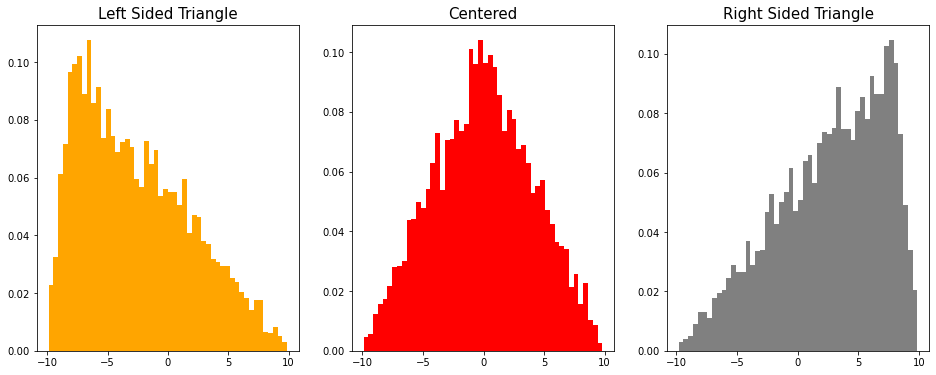

In [29]:
# Define function rng_triang 
def rng_triang (a, b, c, d):
    return np.random.default_rng().triangular(a, b, c, d)

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
#Lower limit, mode, upper limit are known with size=5000
plt.hist(rng_triang(-10, -8, 10, 5000), bins = 50, density = True, color='orange')
plt.title('Left Sided Triangle', fontsize=15)

plt.subplot(1, 3, 2)
#Change the mode to see the distribution shift
plt.hist(rng_triang(-10, 0, 10, 5000), bins = 50, density = True, color='red')
plt.title('Centered', fontsize=15)

plt.subplot(1, 3, 3)
plt.hist(rng_triang(-10, 8, 10, 5000), bins = 50, density = True, color='grey')
plt.title('Right Sided Triangle', fontsize=15)
plt.show()

***

## Task 4: Setting the SeedSequence

A random seed or seed state is a number (or vector) used to initialize a pseudorandom number generator. If a pseudorandom number generator is reinitialized with the same seed, it will produce the same sequence of numbers https://en.wikipedia.org/wiki/Random_seed#:~:text=A%20random%20seed%20%28or%20seed%20state%2C%20or%20just,so%20long%20as%20the%20original%20seed%20is%20ignored%2C

In [30]:
#Import numpy library
import numpy as np

### Pseudo-randomly generated seed

In [31]:
#Generate a pseudo-random SeedSequence
seed_seq_1 = np.random.SeedSequence()
seed_seq_1

SeedSequence(
    entropy=162632434096610932374439038182172926479,
)

### Set the same SeedSequence to generate repeatable results

In [32]:
#Instantiate the SeedSequence
seed_seq_2 = np.random.SeedSequence(22)

#BitGenerator should call this method in its constructor to set its seed
rand_gen_1a = np.random.default_rng(seed_seq_2)
print(rand_gen_1a.random(6))

print("\n")

# seed_seq_2 to get the same output - first 6 elements in the array are the same as rand_gen_1a
rand_gen_1b = np.random.default_rng(seed_seq_2)
print(rand_gen_1b.random(8))

[0.36634692 0.19929538 0.08855837 0.65319169 0.45933704 0.98767562]


[0.36634692 0.19929538 0.08855837 0.65319169 0.45933704 0.98767562
 0.85156807 0.83696132]


### Multi-dimensional arrays with the same pseudo-random data

In [33]:
seed_seq_3 = np.random.SeedSequence(12)

rand_gen_2a = np.random.default_rng(seed_seq_3)

#For loop to create a 2-dimensional array of pseudo-random elements
for r_no in range(4):
    print(rand_gen_2a.random(4))

print("\n")

#Use the same SeedSequence to generate another 2-d array with the same data
rand_gen_2b = np.random.default_rng(seed_seq_3)
for r_no in range(4):
    print(rand_gen_2b.random(4))

[0.25082446 0.94675294 0.18932038 0.17929141]
[0.34988924 0.23054125 0.67044574 0.11507938]
[0.89630937 0.85813049 0.00282703 0.54146616]
[0.10685127 0.25795496 0.41689604 0.45361612]


[0.25082446 0.94675294 0.18932038 0.17929141]
[0.34988924 0.23054125 0.67044574 0.11507938]
[0.89630937 0.85813049 0.00282703 0.54146616]
[0.10685127 0.25795496 0.41689604 0.45361612]


***